In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../data/raw/exam1_data.csv')
df.head()

,x,y
0,34.287927,-5.213964
1,27.535428,7.443368
2,44.670670,-68.283858
3,50.392401,-22.754375
4,13.333478,-3.684400


C:\Users\Estiven Angel\AppData\Local\Temp\ipykernel_35656\3017130609.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


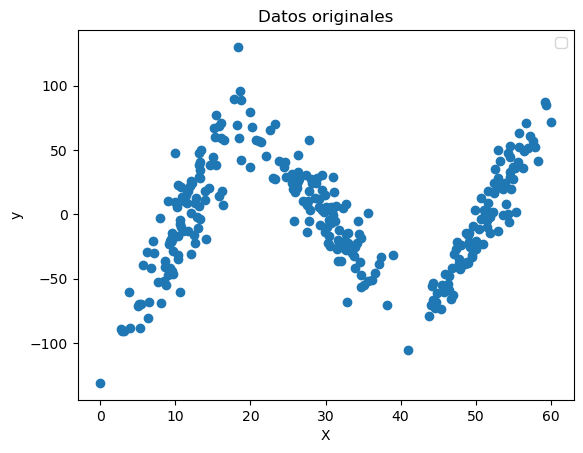

In [3]:
X = df[['x']]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.02, random_state=42)

plt.scatter(X, y)
plt.title("Datos originales")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

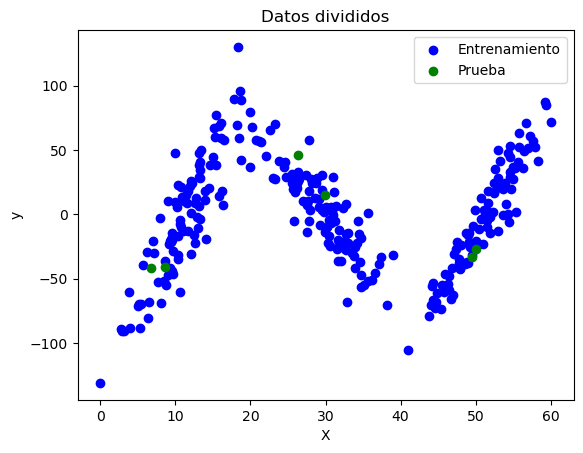

In [4]:
plt.scatter(X_train, y_train, label='Entrenamiento', color='blue')
plt.scatter(X_test, y_test, label='Prueba', color='green')
plt.title("Datos divididos")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [5]:
# Data augmentation:
poly = PolynomialFeatures(degree=3)

X_train_ext = poly.fit_transform(X_train) # Learn and transform the training data
X_test_ext = poly.transform(X_test) # ONLY transforms the test data

In [6]:
# Linear regression:
lin_reg = LinearRegression()
lin_reg.fit(X_train_ext, y_train) # Training model with X data

y_pred = lin_reg.predict(X_test_ext)

In [7]:
print(f"R²: {r2_score(y_test, y_pred)}")

R²: 0.7811338384759036


c:\Users\Estiven Angel\.conda\envs\testEnv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


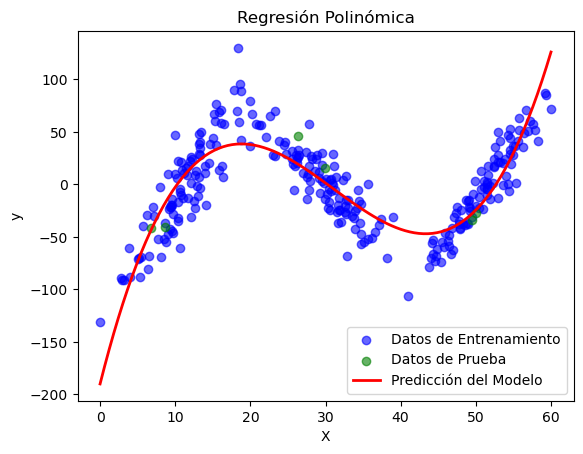

In [8]:
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1) # Create points to plot the wave
X_plot_ext = poly.transform(X_plot) # Transform those points also
y_plot_pred = lin_reg.predict(X_plot_ext) # Predict the points on the wave

# Plot original data
plt.scatter(X_train, y_train, color='blue', label='Datos de Entrenamiento', alpha=0.6)
plt.scatter(X_test, y_test, color='green', label='Datos de Prueba', alpha=0.6)

# Plot regression:
plt.plot(X_plot, y_plot_pred, color='red', linewidth=2, label='Predicción del Modelo')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regresión Polinómica')
plt.legend()
plt.show()